# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [44]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [45]:
df.shape

(4324, 9)

In [46]:
df.shape[0]

4324

In [47]:
df.shape[1]

9

In [48]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [49]:
df.isnull().sum().any()

True

In [50]:
df.isnull()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


In [13]:
df_data.describe

<bound method NDFrame.describe of       Unnamed: 0.1  Unnamed: 0 Organisation  \
0                0           0       SpaceX   
1                1           1         CASC   
2                2           2       SpaceX   
3                3           3    Roscosmos   
4                4           4          ULA   
...            ...         ...          ...   
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                            

In [51]:
df['Date'] = pd.to_datetime(df['Date'])

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [52]:
df = df.drop('Unnamed: 0.1',axis = 1)

In [53]:
df = df.drop('Unnamed: 0',axis = 1)

In [54]:
df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [55]:
df.isna().any()

Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [56]:
df['Price'].isna().sum()

3360

In [57]:
df_data = df.drop('Price',axis = 1)

In [58]:
df_data['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [59]:
df_data['Mission_Status'] = df_data['Mission_Status'].replace(['Success'],1)
df_data['Mission_Status'] = df_data['Mission_Status'].replace(['Failure', 'Prelaunch Failure', 'Partial Failure'],0)

In [60]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,1
...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,1
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,1


In [61]:
df_data['Mission_Status'].unique()

array([1, 0], dtype=int64)

In [32]:
df_data['Organisation'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [33]:
df_data['Organisation'] = df_data['Organisation'].replace(["Arm??e de l'Air"],'AA')

In [34]:
df_data['Organisation'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA', 'AA', 'US Navy'],
      dtype=object)

## Descriptive Statistics

In [35]:
df_data.describe()

,Mission_Status
count,"4,324.00"
mean,0.90
std,0.30
min,0.00
25%,1.00
50%,1.00
75%,1.00
max,1.00


In [36]:
df_data.describe(include=['object'])

,Organisation,Location,Date,Detail,Rocket_Status
count,4324,4324,4324,4324,4324
unique,56,137,4319,4278,2
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2008-11-05 00:15:00+00:00,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired
freq,1777,235,2,6,3534


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<AxesSubplot: xlabel='Organisation', ylabel='count'>

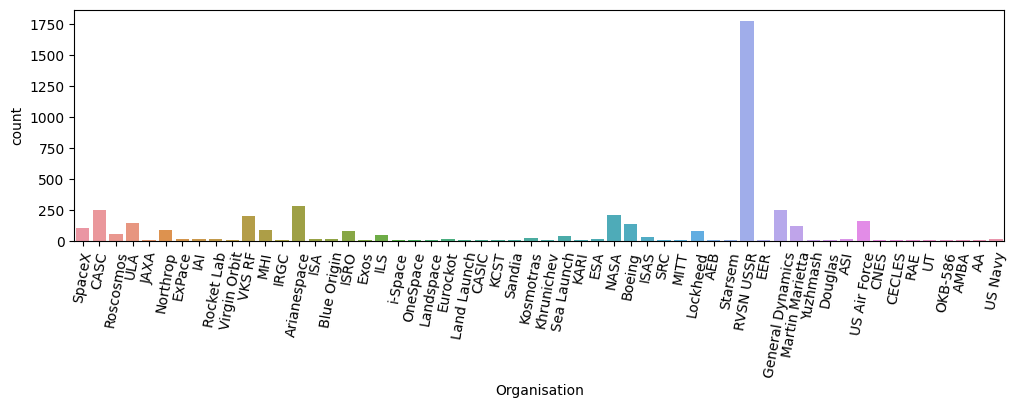

In [41]:
plt.figure(figsize = (12,3))
plt.xticks(rotation=80)
sns.countplot(x = 'Organisation',data = df_data)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

<AxesSubplot: xlabel='Rocket_Status', ylabel='count'>

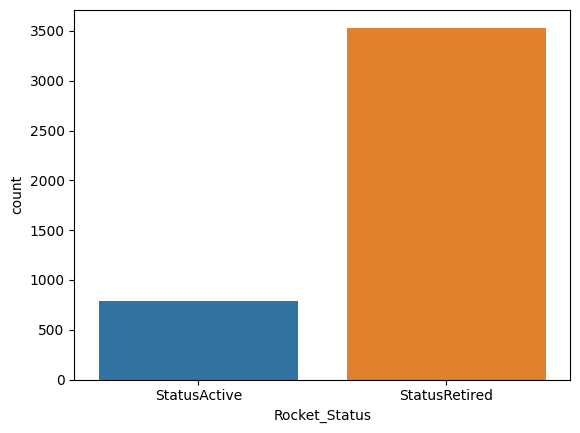

In [42]:
sns.countplot(x ='Rocket_Status',data = df_data)

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

<AxesSubplot: xlabel='Mission_Status', ylabel='count'>

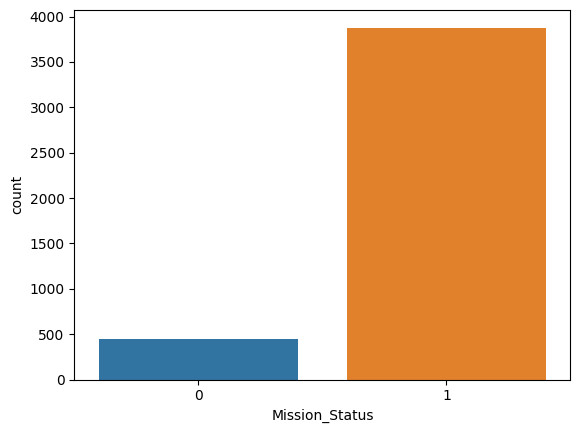

In [43]:
sns.countplot(x ='Mission_Status',data = df_data)

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [62]:
price_df = df.dropna()

(array([150.,  77.,  75., 135., 159.,  85.,  49.,  38., 150.,  46.]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <BarContainer object of 10 artists>)

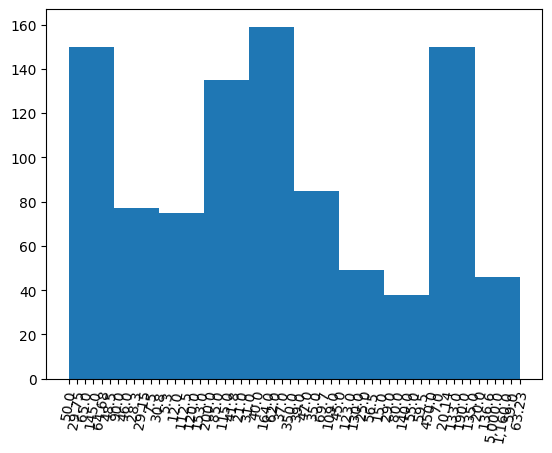

In [65]:
plt.xticks(rotation=80)
plt.hist(price_df['Price'])

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [75]:
total_amount = 0
price_df['Price'] = price_df['Price'].astype(float)
for organization in price_df['Organisation'].unique():
    organization_total = price_df.loc[price_df['Organisation'] == organization, 'Price'].sum()
    total_amount += organization_total
    print(organization ," Total Amount:", organization_total)

print("Overall Total Amount:", total_amount)


SpaceX  Total Amount: 5444.0
CASC  Total Amount: 6340.260000000002
Roscosmos  Total Amount: 1187.5
ULA  Total Amount: 14798.0
JAXA  Total Amount: 168.0
Northrop  Total Amount: 3930.0
ExPace  Total Amount: 28.3
Rocket Lab  Total Amount: 97.5
Virgin Orbit  Total Amount: 12.0
MHI  Total Amount: 3532.5
Arianespace  Total Amount: 16345.0
VKS RF  Total Amount: 1548.9
ISRO  Total Amount: 2177.0
ILS  Total Amount: 1320.0
Eurockot  Total Amount: 543.4
Sandia  Total Amount: 15.0
Kosmotras  Total Amount: 638.0
ESA  Total Amount: 37.0
NASA  Total Amount: 76280.0
Boeing  Total Amount: 1241.0
Lockheed  Total Amount: 280.0
EER  Total Amount: 20.0
Martin Marietta  Total Amount: 721.4
RVSN USSR  Total Amount: 10000.0
US Air Force  Total Amount: 1550.92
Overall Total Amount: 148255.68


C:\Users\anagha\AppData\Local\Temp\ipykernel_29072\3048689460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Price'] = price_df['Price'].astype(float)
